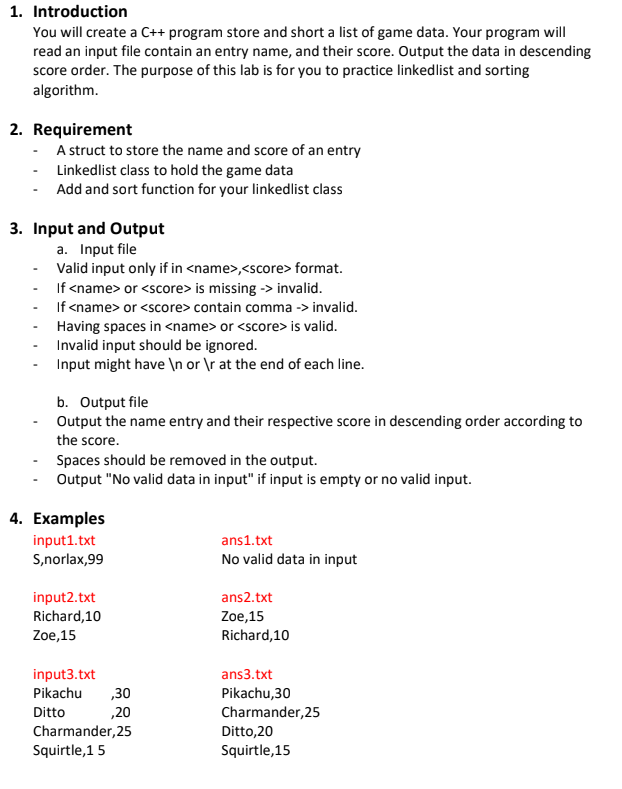

In [ ]:
// importing the required libraries
#include<bits/stdc++.h>
#include<fstream>
using namespace std;
// defining the structure
struct gameData{
    // variable to store username
    string userName;
    // variable to store score
    int userScore;
    // link to next node
    gameData* nextLink;
    // defining the null linkedlist
    gameData() { nextLink = nullptr; }
    // initializing the linkedlist
    gameData(string nameOfUser, int scoreOfUser){
        // linkedlist contains username, userscore and pointer to next node
        userName = nameOfUser;
        userScore = scoreOfUser;
        nextLink = nullptr;
    }
};

// defining the class
class linkedListDefined{
    // defining the private members
    private:
        gameData* header;
    // defining the public members
    public:
        // initially pointing the linked list to null
        linkedListDefined() {
            header = nullptr;
        }
        // checking the values
        void Check(string n, int s){
            gameData *newgameData = new gameData(n, s);
            newgameData->nextLink = header;
            header = newgameData;
        }   


    // initializing the sorting on data
    void sortData(){
        // for values in which only two data points are mentioned
        if(header == nullptr || header->nextLink == nullptr)
            return;
        
        gameData *temp = header;
        
        // loop till the null pointer
        while (temp != nullptr){
            // getting the maximum value from the file
            gameData* maxValue = temp;
            gameData* tempNodeNextValue = temp->nextLink;
    
            // travering the linkedlist 
            while(tempNodeNextValue != nullptr){   
                // soring the data
                if (maxValue->userScore < tempNodeNextValue->userScore)
                    maxValue = tempNodeNextValue;
    
                tempNodeNextValue = tempNodeNextValue->nextLink;
            }
 
            // swaping the values
            int swapData = temp->userScore;
            string userName = temp->userName;
            temp->userScore = maxValue->userScore;
            temp->userName = maxValue->userName;
            maxValue->userName = userName;
            maxValue->userScore = swapData;

            temp = temp->nextLink;
        }
    }
    // return to header
    gameData* getheader()
    {
        return header;
    }
};


// defining the main method
int main(){
    // defining the linkedlist
    linkedListDefined list;
    cout << "Enter the Input file name: ";
    // getting the file name form the user
    string inputFileuserName;
    cin >> inputFileuserName;

    ifstream file(inputFileuserName);
    // checking whether the file is present or not
    if(!file){
        cout << "Could not open input file" << endl;
        return 0;
    }
    // defining the line temp and data
    string line;
    // geting each line from file
    while(getline(file, line)){   
        // continue till the line is 0
        if(line.length() == 0)
            continue;

        string data;
        string temp;
        // removing the while spaces
        for (int i = 0; i < line.length(); i++)
            if (line[i] != ' ')
                data.push_back(line[i]);


        stringstream splitData(data);

        try
        {
            // spliting the data by using the comma(,)
            getline(splitData, temp, ',');
            string userName = temp;
            // converting string to integer type
            getline(splitData, temp, ',');
            int userScore = stoi(temp); 

            list.Check(userName, userScore);
        }
        catch(const std::exception& e)
        {
            cout<<"Exception occured: \n";
        }
    }   
    // sorting the list

    list.sortData();
    // getting the output file name from user
    cout << "Enter output fileuserName: ";
    string outputFileuserName;
    cin >> outputFileuserName;
    ofstream outputfile(outputFileuserName);
    gameData*temp = list.getheader();
    if(temp == nullptr)
        outputfile << "No valid data in input\n";
    else{
        // writing the data into output file
        while(temp  != nullptr)
        {
            outputfile << temp->userName << "," << temp->userScore << endl;
            temp = temp->nextLink;
        }
    }

    cout << " The solution can be found in the file:  " << outputFileuserName << endl;
}